<a href="https://colab.research.google.com/github/Joe-Chege/HiveMQ-MQTTbroker/blob/main/datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests

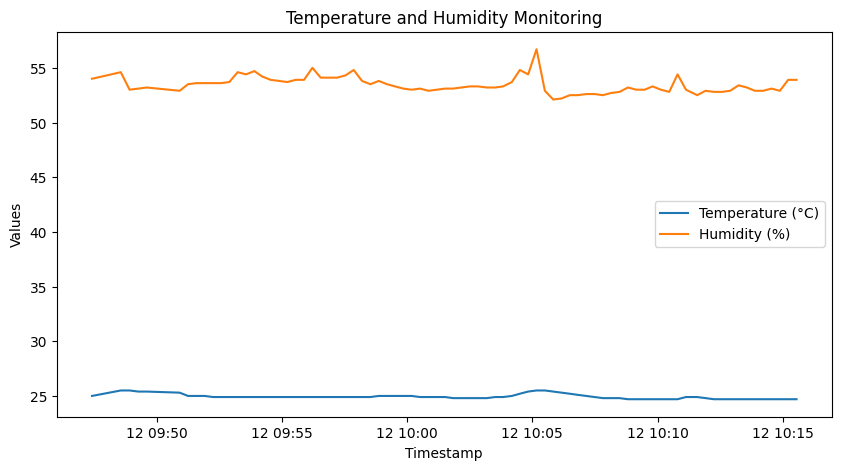

In [2]:
'''
* DATA MONITORING & VISUALIZATION------------------
*  # Devices:
*     -> DHT22 sensor
*     -> ESP32
*  # Technologies:
*     -> Protocol: HTTP
*     -> Platform: ThingSpeak + Google Colab
*  # Activity:
*    -> Data transmission, monitoring and visualization
*       - Single chart on Google Colab
*
*   ANGAZA ELIMU&ALX - IOT SCHOOL: Cohort 1, 2024
* --------------------------------------------------
'''

'''
 Support libraries -------------------------------------------------------------
'''
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#---- ThingSpeak API details
CHANNEL_ID = "2740854"
API_KEY = "TJLO6WT9X244LEXB" # Read API Key
THINGSPEAK_URL = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/feeds.json?api_key={API_KEY}&results=100"

# ---- Fetch data from ThingSpeak
response = requests.get(THINGSPEAK_URL)
data = response.json()

#---- Parse data
timestamps = [entry['created_at'] for entry in data['feeds']]
temperature = [float(entry['field1']) for entry in data['feeds']]
humidity = [float(entry['field2']) for entry in data['feeds']]

#---- Create DataFrame
df = pd.DataFrame({'Timestamp': timestamps, 'Temperature': temperature, 'Humidity': humidity})
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#---- Plot data
plt.figure(figsize=(10,5))
plt.plot(df['Timestamp'], df['Temperature'], label='Temperature (°C)')
plt.plot(df['Timestamp'], df['Humidity'], label='Humidity (%)')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Temperature and Humidity Monitoring')
plt.legend()
plt.show()


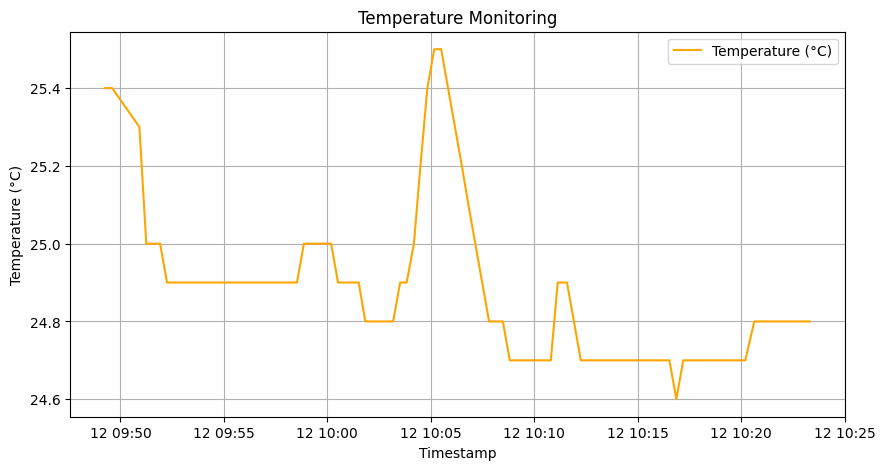

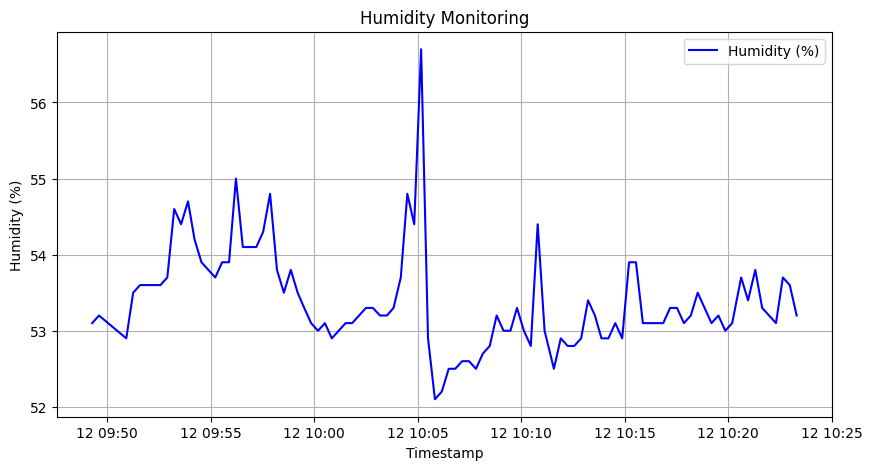

In [3]:
'''
* DATA MONITORING & VISUALIZATION------------------
*  # Devices:
*     -> DHT22 sensor
*     -> ESP32
*  # Technologies:
*     -> Protocol: HTTP
*     -> Platform: ThingSpeak + Google Colab
*  # Activity:
*    -> Data transmission, monitoring and visualization
*       - Multi charts on Google Colab
*
*   ANGAZA ELIMU&ALX - IOT SCHOOL: Cohort 1, 2024
* --------------------------------------------------
'''

'''
 Support libraries -------------------------------------------------------------
'''
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#---- ThingSpeak API details
CHANNEL_ID = "2740854"
API_KEY = "TJLO6WT9X244LEXB" # Read API Key
THINGSPEAK_URL = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/feeds.json?api_key={API_KEY}&results=100"

# ---- Fetch data from ThingSpeak
response = requests.get(THINGSPEAK_URL)
data = response.json()

#----  Parse data
timestamps = [entry['created_at'] for entry in data['feeds']]
temperature = [float(entry['field1']) for entry in data['feeds']]
humidity = [float(entry['field2']) for entry in data['feeds']]

#---- Create DataFrame
df = pd.DataFrame({'Timestamp': timestamps, 'Temperature': temperature, 'Humidity': humidity})
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#---- Plot Temperature
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Temperature'], color='orange', label='Temperature (°C)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Monitoring')
plt.legend()
plt.grid()
plt.show()

#---- Plot Humidity
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Humidity'], color='blue', label='Humidity (%)')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title('Humidity Monitoring')
plt.legend()
plt.grid()
plt.show()


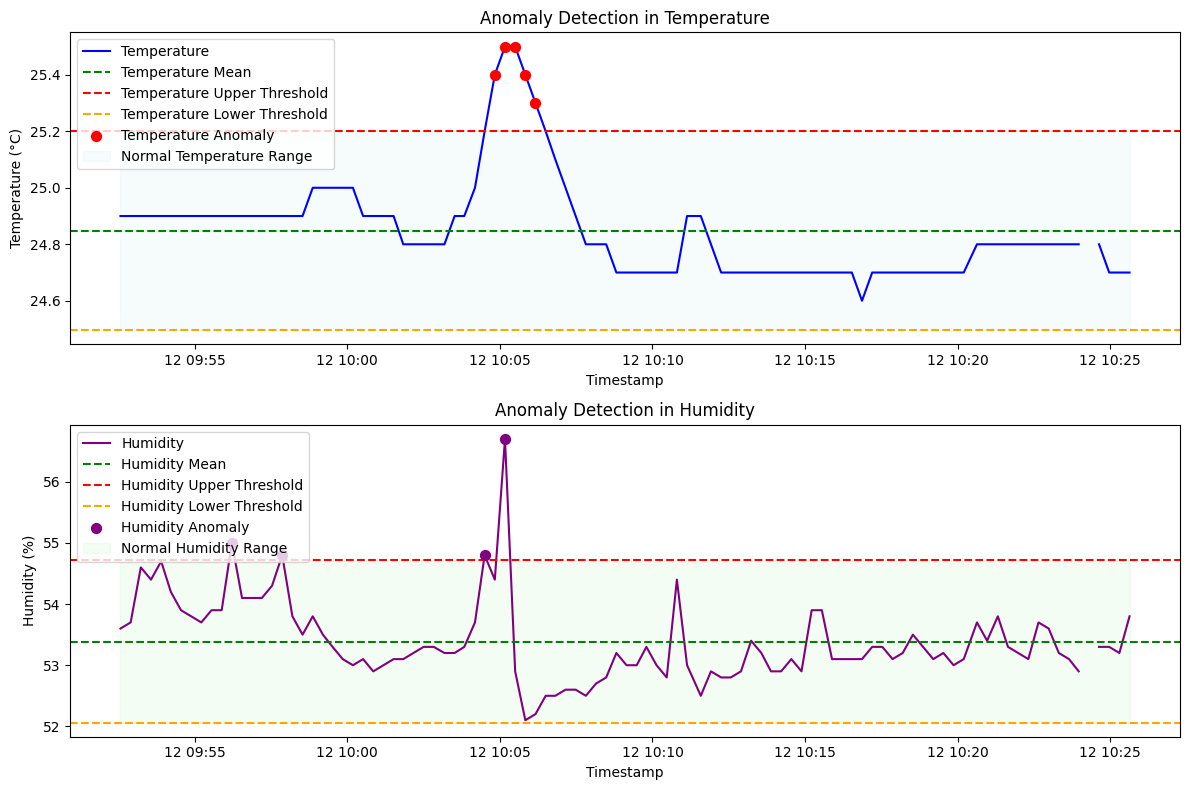

In [4]:
'''
* DATA MONITORING & VISUALIZATION------------------
*  # Devices:
*     -> DHT22 sensor
*     -> ESP32
*  # Technologies:
*     -> Protocol: HTTP
*     -> Platform: ThingSpeak + Google Colab
*  # Activity:
*    -> Data transmission, monitoring and visualization
*       - Anomalies detection in temperature&humidity data trends
*
*   ANGAZA ELIMU&ALX - IOT SCHOOL: Cohort 1, 2024
* --------------------------------------------------
'''

'''
 Support libraries -------------------------------------------------------------
'''
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

#---- ThingSpeak API details
CHANNEL_ID = "2740854"
API_KEY = "TJLO6WT9X244LEXB" # Read API Key
THINGSPEAK_URL = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/feeds.json?api_key={API_KEY}&results=100"

# ---- Fetch data from ThingSpeak
response = requests.get(THINGSPEAK_URL)
data = response.json()

# ---- Extract data
timestamps = [entry['created_at'] for entry in data['feeds']]
temperature = [float(entry['field1']) for entry in data['feeds']]
humidity = [float(entry['field2']) for entry in data['feeds']]

# ---- Dataframe setup
df = pd.DataFrame({'Timestamp': timestamps, 'Temperature': temperature, 'Humidity': humidity})
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# ---- Anomaly thresholds definition
# compute the average mean and std deviation
temp_mean, temp_std = np.mean(df['Temperature']), np.std(df['Temperature'])
hum_mean, hum_std = np.mean(df['Humidity']), np.std(df['Humidity'])

# define lower and upper limit thresholds
temp_threshold_upper = temp_mean + 2 * temp_std
temp_threshold_lower = temp_mean - 2 * temp_std
hum_threshold_upper = hum_mean + 2 * hum_std
hum_threshold_lower = hum_mean - 2 * hum_std

# ---- Flag anomalies
df['Temp_Anomaly'] = (df['Temperature'] > temp_threshold_upper) | (df['Temperature'] < temp_threshold_lower)
df['Hum_Anomaly'] = (df['Humidity'] > hum_threshold_upper) | (df['Humidity'] < hum_threshold_lower)

# ---- Plot data and anomalies
plt.figure(figsize=(12, 8))

# ---- Plot temperature data with mean and threshold lines
plt.subplot(2, 1, 1)
plt.plot(df['Timestamp'], df['Temperature'], label='Temperature', color='blue')
plt.axhline(temp_mean, color='green', linestyle='--', label='Temperature Mean')
plt.axhline(temp_threshold_upper, color='red', linestyle='--', label='Temperature Upper Threshold')
plt.axhline(temp_threshold_lower, color='orange', linestyle='--', label='Temperature Lower Threshold')
plt.scatter(df[df['Temp_Anomaly']]['Timestamp'], df[df['Temp_Anomaly']]['Temperature'], color='red', label='Temperature Anomaly', s=50, zorder=5)
plt.fill_between(df['Timestamp'], temp_threshold_lower, temp_threshold_upper, color='lightblue', alpha=0.1, label='Normal Temperature Range')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper left')
plt.title('Anomaly Detection in Temperature')

# ---- Plot humidity data with mean and threshold lines
plt.subplot(2, 1, 2)
plt.plot(df['Timestamp'], df['Humidity'], label='Humidity', color='purple')
plt.axhline(hum_mean, color='green', linestyle='--', label='Humidity Mean')
plt.axhline(hum_threshold_upper, color='red', linestyle='--', label='Humidity Upper Threshold')
plt.axhline(hum_threshold_lower, color='orange', linestyle='--', label='Humidity Lower Threshold')
plt.scatter(df[df['Hum_Anomaly']]['Timestamp'], df[df['Hum_Anomaly']]['Humidity'], color='purple', label='Humidity Anomaly', s=50, zorder=5)
plt.fill_between(df['Timestamp'], hum_threshold_lower, hum_threshold_upper, color='lightgreen', alpha=0.1, label='Normal Humidity Range')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.legend(loc='upper left')
plt.title('Anomaly Detection in Humidity')

plt.tight_layout()
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp62tr7h1c/0cmdl7em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp62tr7h1c/lx04znmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93988', 'data', 'file=/tmp/tmp62tr7h1c/0cmdl7em.json', 'init=/tmp/tmp62tr7h1c/lx04znmy.json', 'output', 'file=/tmp/tmp62tr7h1c/prophet_model25v0mehg/prophet_model-20241112103711.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:37:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:11 - cmdstanpy - INFO - Chai

<Figure size 1000x500 with 0 Axes>

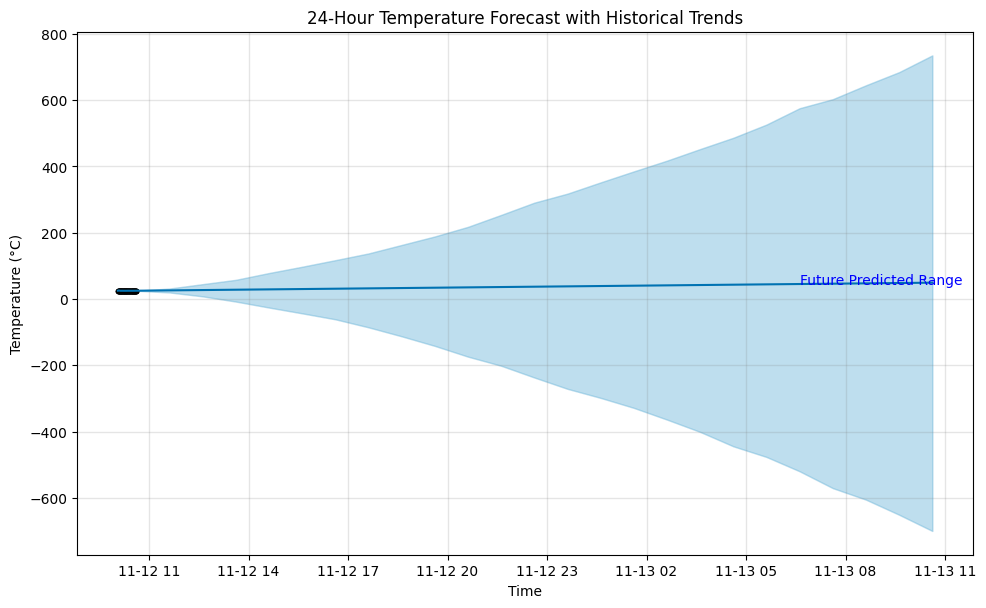

<Figure size 1000x500 with 0 Axes>

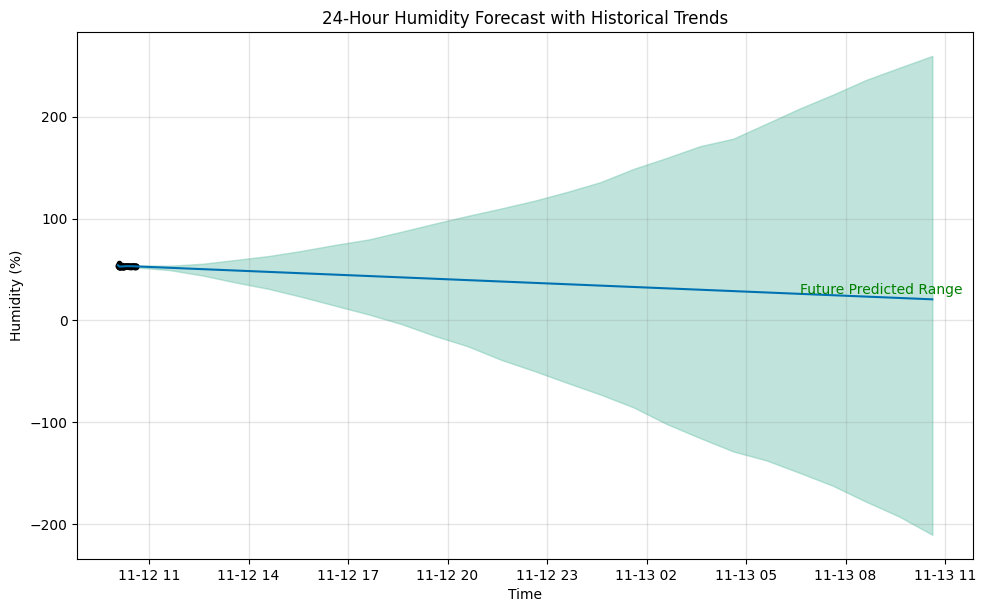

In [8]:
'''
* DATA MONITORING & VISUALIZATION------------------
*  # Devices:
*     -> DHT22 sensor
*     -> ESP32
*  # Technologies:
*     -> Protocol: HTTP
*     -> Platform: ThingSpeak + Google Colab
*  # Activity:
*    -> Data transmission, monitoring and visualization
*       - Time series basic weather forecasting and prediction
*
*   ANGAZA ELIMU&ALX - IOT SCHOOL: Cohort 1, 2024
* --------------------------------------------------
'''

'''
 Support libraries -------------------------------------------------------------
'''
import requests
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

#---- ThingSpeak API details
CHANNEL_ID = "2740854"
API_KEY = "TJLO6WT9X244LEXB" # Read API Key
THINGSPEAK_URL = f"https://api.thingspeak.com/channels/{CHANNEL_ID}/feeds.json?api_key={API_KEY}&results=100"

# ---- Fetch data from ThingSpeak
response = requests.get(THINGSPEAK_URL)
data = response.json()

# ---- Parse data
timestamps = [entry['created_at'] for entry in data['feeds']]
temperature = [float(entry['field1']) for entry in data['feeds']]
humidity = [float(entry['field2']) for entry in data['feeds']]

# ---- Create DataFrame
df = pd.DataFrame({'Timestamp': timestamps, 'Temperature': temperature, 'Humidity': humidity})
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# ---- Prepare data for Prophet - the future forecasting handler lib
temperature_df = df[['Timestamp', 'Temperature']].rename(columns={'Timestamp': 'ds', 'Temperature': 'y'})
humidity_df = df[['Timestamp', 'Humidity']].rename(columns={'Timestamp': 'ds', 'Humidity': 'y'})

# ---- Remove timezone from 'ds' column - timezone not required for the prophet future forecasting lib handler lib
temperature_df['ds'] = temperature_df['ds'].dt.tz_localize(None)
humidity_df['ds'] = humidity_df['ds'].dt.tz_localize(None)

# ---- Fit Prophet model for Temperature Forecasting
temp_model = Prophet(interval_width=0.95)  # Set prediction interval to 95%
temp_model.fit(temperature_df)

# ---- Forecasting 24 hours into the future
future_temp = temp_model.make_future_dataframe(periods=24, freq='h')
temp_forecast = temp_model.predict(future_temp)

# ---- Plot Temperature Forecast
plt.figure(figsize=(10, 5))
temp_model.plot(temp_forecast, xlabel='Time', ylabel='Temperature (°C)')
plt.title('24-Hour Temperature Forecast with Historical Trends')
plt.grid(True)

# ---- Highlight observed data period
plt.fill_between(temp_forecast['ds'], temp_forecast['yhat_lower'], temp_forecast['yhat_upper'], color='skyblue', alpha=0.2)
plt.annotate('Future Predicted Range', xy=(temp_forecast['ds'].iloc[-5], temp_forecast['yhat'].iloc[-5]), color='blue')

# ---- Fit Prophet model for Humidity Forecasting
humidity_model = Prophet(interval_width=0.95)
humidity_model.fit(humidity_df)

# ---- Forecasting 24 hours into the future
future_humidity = humidity_model.make_future_dataframe(periods=24, freq='h')
humidity_forecast = humidity_model.predict(future_humidity)

# ---- Plot Humidity Forecast
plt.figure(figsize=(10, 5))
humidity_model.plot(humidity_forecast, xlabel='Time', ylabel='Humidity (%)')
plt.title('24-Hour Humidity Forecast with Historical Trends')
plt.grid(True)

# ---- Highlight observed data period
plt.fill_between(humidity_forecast['ds'], humidity_forecast['yhat_lower'], humidity_forecast['yhat_upper'], color='lightgreen', alpha=0.2)
plt.annotate('Future Predicted Range', xy=(humidity_forecast['ds'].iloc[-5], humidity_forecast['yhat'].iloc[-5]), color='green')

# ---- Plot the forecast
plt.show()
